In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy
from scipy import stats

In [44]:
df=pd.read_csv('C:/Users/rajat/Desktop/rob/robin/kaggle predicion_titanic/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
target=df['Survived']

In [46]:
train=df.drop(['Survived'],axis=1)

In [47]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

177

<AxesSubplot:xlabel='Age', ylabel='Density'>

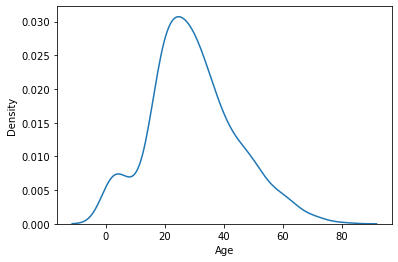

In [49]:
sns.kdeplot(train['Age'])

In [50]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [51]:
train['Age'].fillna(df['Age'].median(),inplace=True)

In [53]:
train['Age'].median()

28.0

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

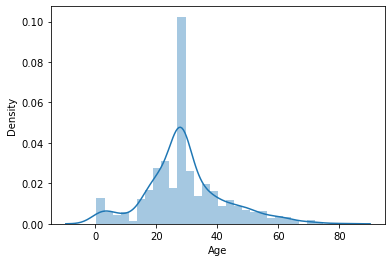

In [55]:
sns.distplot(train['Age'])

# graph is quite wierd since certain age is dominating the data

In [59]:
l=[]
for i in range(150):
    l.append(np.random.randint(20,38))
np.mean(l)

29.053333333333335

In [64]:
train['Age']=df['Age']

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

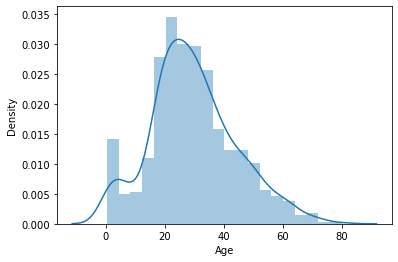

In [65]:
sns.distplot(train['Age'])

In [66]:
for i in train['Age'].index:
    if(np.isnan(train.loc[i,'Age'])):
        train.loc[i,'Age']=np.random.randint(20,38)

# assigning random integer to NAN values in the inter-quartile range(20,38)

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

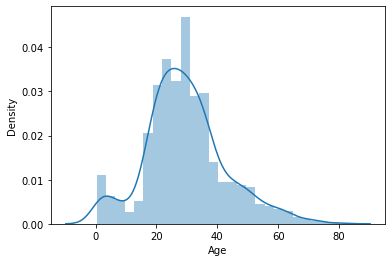

In [67]:
sns.distplot(train['Age'])

# data is maintaining the previous shape of histogram

In [68]:
train['Age'].describe()

count    891.000000
mean      29.486162
std       13.221749
min        0.420000
25%       21.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

# we can see that passenger id and name can't have a correaltion with survived class, so it is safe to drop it from our training data

In [73]:
train.drop('PassengerId',axis=1,inplace=True)

In [75]:
train.drop('Name',axis=1,inplace=True)

In [76]:
train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,female,19.0,0,0,112053,30.0000,B42,S
888,3,female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,26.0,0,0,111369,30.0000,C148,C


In [78]:
train['Ticket'].value_counts()

347082              7
CA. 2343            7
1601                7
3101295             6
347088              6
                   ..
4579                1
113786              1
363294              1
STON/O2. 3101283    1
370373              1
Name: Ticket, Length: 681, dtype: int64

In [80]:
train['Ticket'].nunique()

681

# ticket has 681 unique values, so no dominant class or classes to help our model, it is safe to drop it. 

In [81]:
train.drop('Ticket',axis=1,inplace=True)

In [82]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,24.0,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [83]:
train['Cabin'].isna().sum()

687

In [84]:
train['Cabin'].nunique()

147

In [85]:
train['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
F33            3
              ..
E17            1
E77            1
E38            1
B71            1
T              1
Name: Cabin, Length: 147, dtype: int64

# Cabin has 687 missing values. Also it does not have a dominating class to help us out in figuring out a pattern, so it is safe to drop it

In [86]:
train.drop('Cabin',axis=1,inplace=True)

In [87]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [90]:
train['SibSp'].nunique()

7

In [93]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

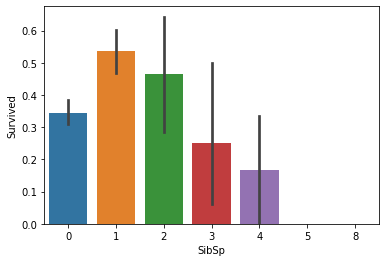

In [94]:
sns.barplot(x=train['SibSp'],y=target)

In [95]:
cr=pd.crosstab(train['SibSp'],target)

In [97]:
stats.chi2_contingency(cr)[1]

1.5585810465902147e-06

# chi2 test shows p-value much lower than 0.05(our significant level), so realtion between SibSp and target variable is significant

In [100]:
def cramers_corrected_stat(x,y):

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = stats.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        if(kcorr==1):
            kcorr=float('inf')
        elif(rcorr==1):
            rcorr==float('inf')
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

In [101]:
cramers_corrected_stat(train['SibSp'],target)

0.187428

# crammer coef value is not much but still will help with our analysis

In [102]:
train['SibSp'].isna().sum()

0

In [103]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [105]:
train['Parch'].isna().sum()

0

In [106]:
train['Parch'].nunique()

7

In [107]:
train['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

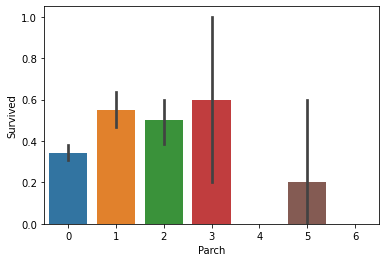

In [108]:
sns.barplot(x=train['Parch'],y=target)

In [109]:
cr=pd.crosstab(train['Parch'],target)

In [110]:
stats.chi2_contingency(cr)[1]

9.703526421039997e-05

# also much lower that 0.05, means relation is quite significant

In [111]:
cramers_corrected_stat(train['Parch'],target)

0.156934

# crammer v coef is good enough to take this column into account

In [112]:
train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


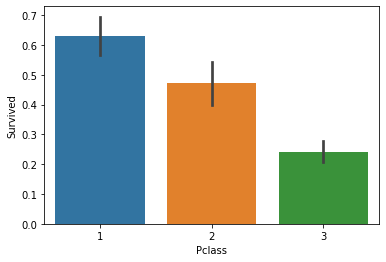

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


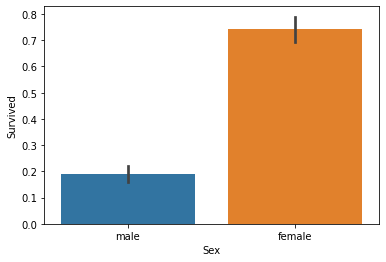

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


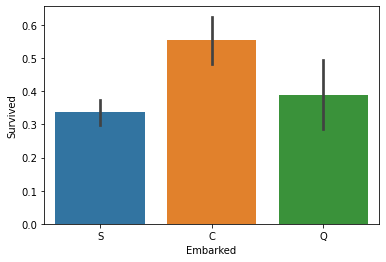

In [117]:
for i in ['Pclass', 'Sex', 'Embarked']:
    sns.barplot(train[i],target)
    plt.show()

In [114]:
for i in ['Pclass', 'Sex', 'Embarked']:
    cr=pd.crosstab(train[i],target)
    if(stats.chi2_contingency(cr)[1]<0.005):
        print(i)

Pclass
Sex
Embarked


In [116]:
for i in ['Pclass', 'Sex', 'Embarked']:
    print(i,cramers_corrected_stat(train[i],target))
        

Pclass 0.336684
Sex 0.542621
Embarked 0.166058


# All class come out to pretty significant especially sex and pcalss

In [118]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [122]:
for i in ['Age','Fare']:
    print(i,train[i].corr(target))

Age -0.06070606626489359
Fare 0.2573065223849622


<AxesSubplot:xlabel='Survived', ylabel='Age'>

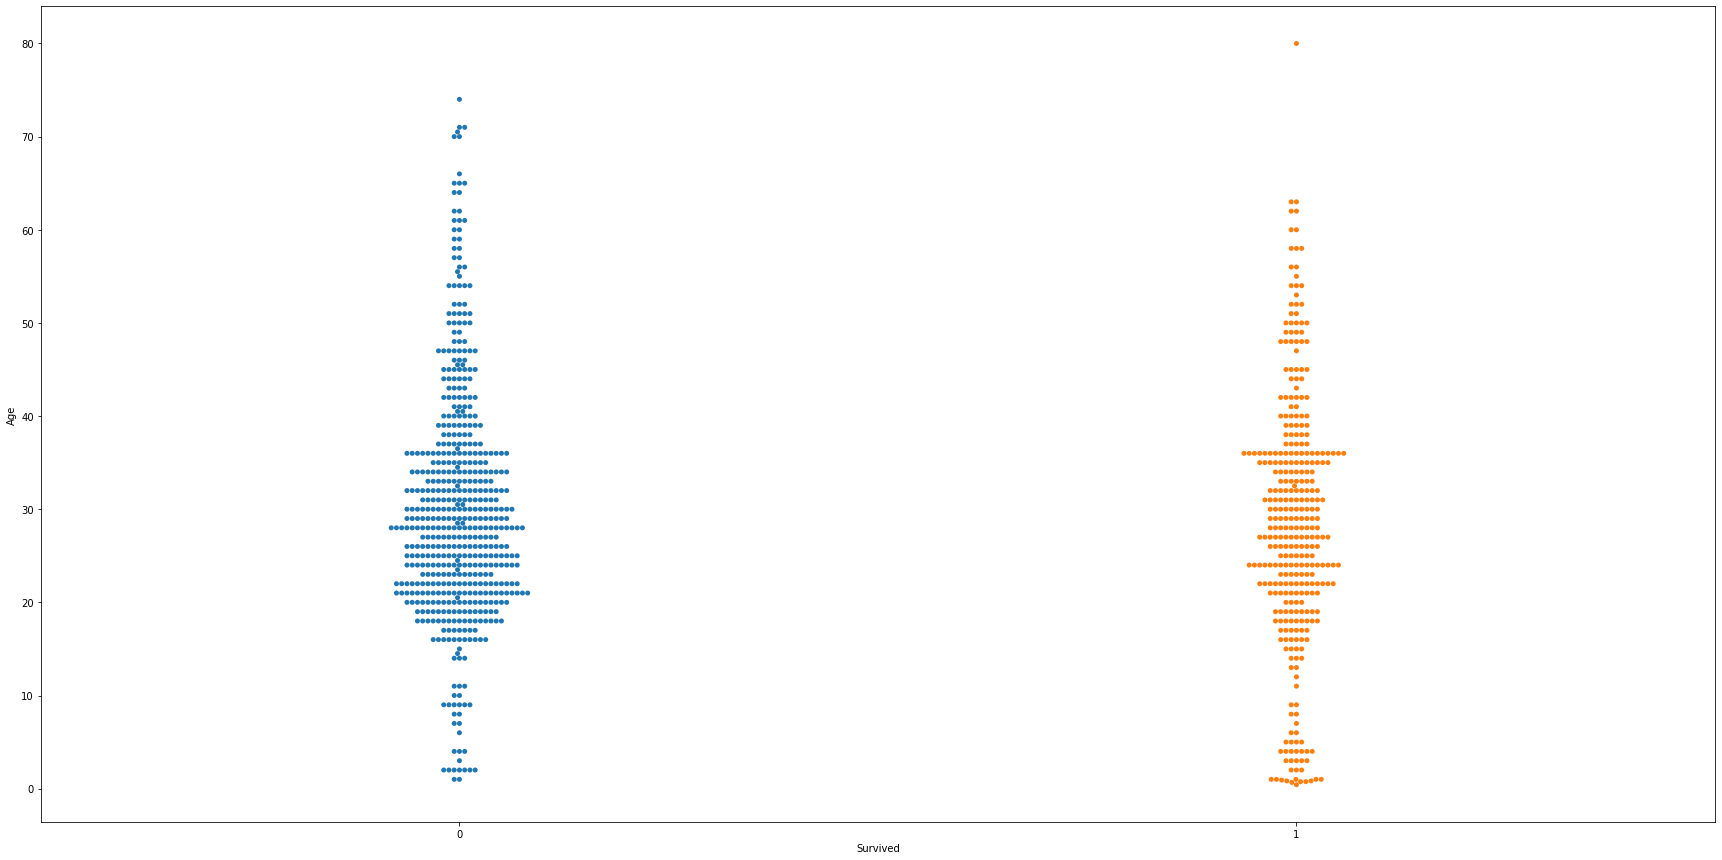

In [127]:
plt.figure(figsize=(30,15))
sns.swarmplot(x=target,y=train['Age'])

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

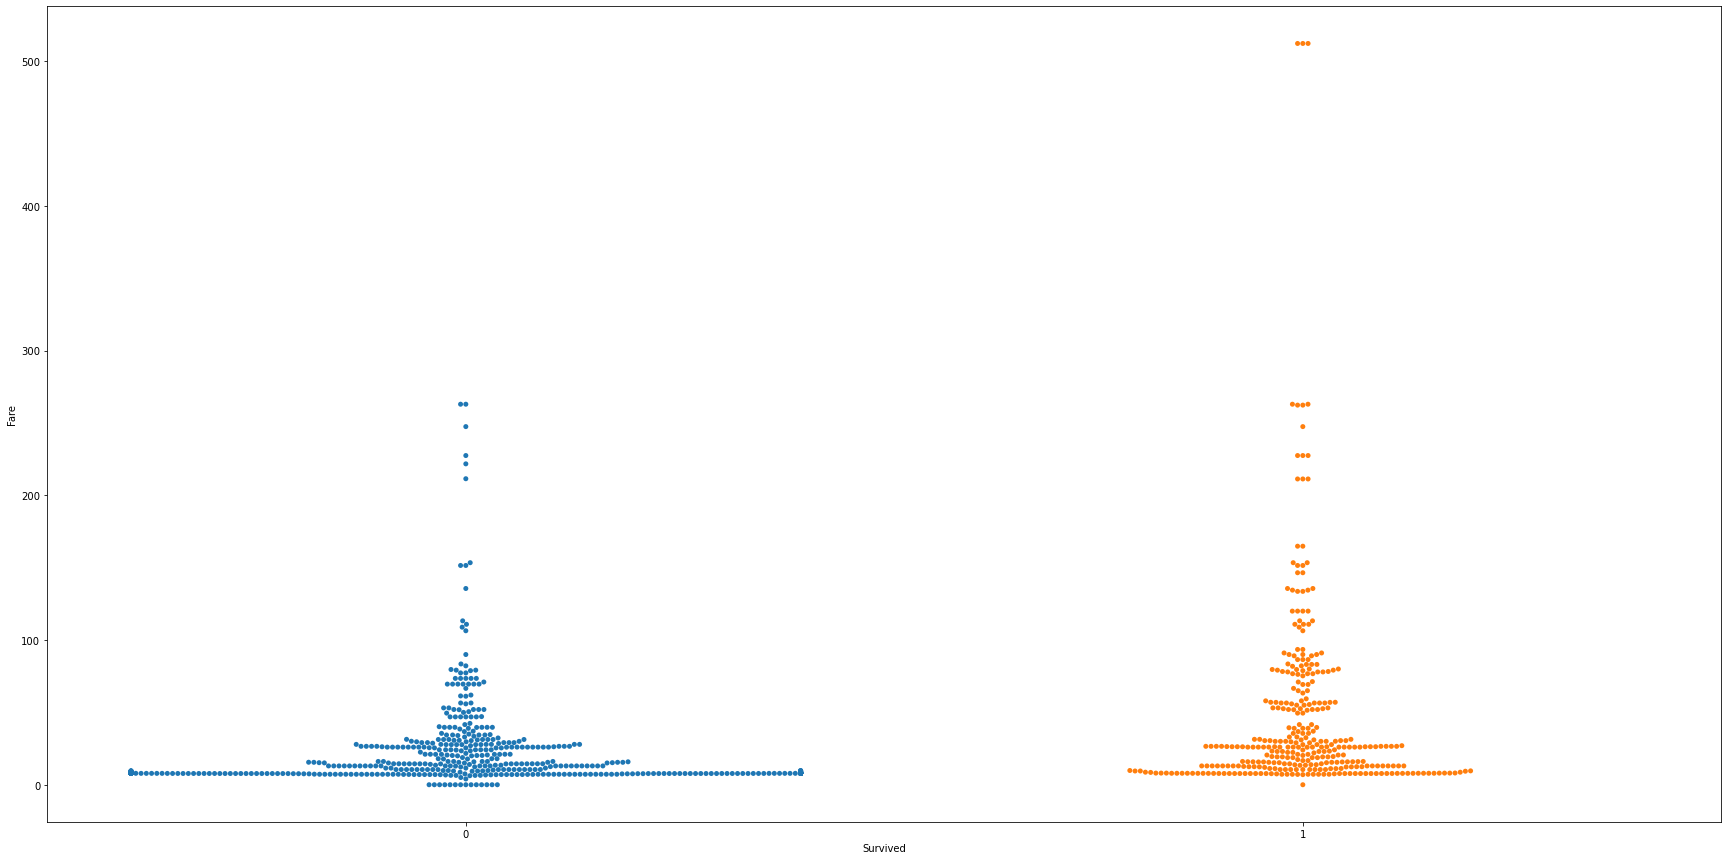

In [126]:
plt.figure(figsize=(30,15))
sns.swarmplot(x=target,y=train['Fare'])

# more fare increases the chances of survival according to the above swarmplot

In [128]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()

In [140]:
num_data=train[['Fare','Age']]

In [141]:
from sklearn.model_selection import train_test_split
Z=train_test_split(num_data,target,train_size=0.75,random_state=10)

In [142]:
logr.fit(Z[0],Z[2])

LogisticRegression()

In [143]:
logr.score(Z[1],Z[3])

0.726457399103139

# R2 score increases after taking both fare and age so age included in the model 

In [129]:
logr.fit(train[['Fare']],target)

LogisticRegression()

In [150]:
len(train['Embarked'])

891

In [144]:
train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [145]:
from sklearn.impute import SimpleImputer

In [146]:
S=SimpleImputer(strategy='most_frequent')

In [156]:
train['Embarked']=pd.Series(S.fit_transform(train[['Embarked']]).reshape(1,891)[0])

In [157]:
train['Embarked'].isna().sum()

0

In [158]:
train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [233]:
ser=train.nunique()
l=list(ser[ser<10].index)

In [234]:
l

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [170]:
ans=[]
for i in l:
    sig=0.05/(train[i].nunique())
    train_temp=pd.get_dummies(train[i])
    k=[]
    for j in train_temp.columns:
        if(stats.chi2_contingency(pd.crosstab(train_temp[j],target))[1] < sig):
            k.append(i+str(j))
    if(len(k)==len(train_temp.columns)):
        k.pop()
    ans.extend(k)

In [171]:
ans

['Pclass1',
 'Pclass2',
 'Sexfemale',
 'SibSp0',
 'SibSp1',
 'Parch0',
 'Parch1',
 'EmbarkedC',
 'EmbarkedS']

In [172]:
traincateg1=pd.get_dummies(train[l],drop_first=True)

In [264]:
finaltrain1=pd.concat([traincateg1,train[['Age','Fare']]],axis=1)

In [265]:
finaltrain1

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age,Fare
0,3,1,0,1,0,1,22.0,7.2500
1,1,1,0,0,0,0,38.0,71.2833
2,3,0,0,0,0,1,26.0,7.9250
3,1,1,0,0,0,1,35.0,53.1000
4,3,0,0,1,0,1,35.0,8.0500
...,...,...,...,...,...,...,...,...
886,2,0,0,1,0,1,27.0,13.0000
887,1,0,0,0,0,1,19.0,30.0000
888,3,1,2,0,0,1,24.0,23.4500
889,1,0,0,1,0,0,26.0,30.0000


In [185]:
 traincateg2=pd.DataFrame()

In [196]:
for i in l:
    temp=pd.get_dummies(train[i])
    for j in temp.columns:
        print(i+str(j))
        if((i+str(j)) in ans):
            traincateg2=pd.concat([traincateg2,pd.Series(temp[j],name=(i+str(j)))],axis=1)

Pclass1
Pclass2
Pclass3
Sexfemale
Sexmale
SibSp0
SibSp1
SibSp2
SibSp3
SibSp4
SibSp5
SibSp8
Parch0
Parch1
Parch2
Parch3
Parch4
Parch5
Parch6
EmbarkedC
EmbarkedQ
EmbarkedS


In [197]:
traincateg2

,Pclass1,Pclass2,Sexfemale,SibSp0,SibSp1,Parch0,Parch1,EmbarkedC,EmbarkedS
0,0,0,0,0,1,1,0,0,1
1,1,0,1,0,1,1,0,1,0
2,0,0,1,1,0,1,0,0,1
3,1,0,1,0,1,1,0,0,1
4,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,1,0,0,1
887,1,0,1,1,0,1,0,0,1
888,0,0,1,0,1,0,0,0,1
889,1,0,0,1,0,1,0,1,0


In [268]:
finaltrain2=pd.concat([traincateg2,train[['Age','Fare']]],axis=1)

In [269]:
finaltrain2

,Pclass1,Pclass2,Sexfemale,SibSp0,SibSp1,Parch0,Parch1,EmbarkedC,EmbarkedS,Age,Fare
0,0,0,0,0,1,1,0,0,1,22.0,7.2500
1,1,0,1,0,1,1,0,1,0,38.0,71.2833
2,0,0,1,1,0,1,0,0,1,26.0,7.9250
3,1,0,1,0,1,1,0,0,1,35.0,53.1000
4,0,0,0,1,0,1,0,0,1,35.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,1,0,0,1,27.0,13.0000
887,1,0,1,1,0,1,0,0,1,19.0,30.0000
888,0,0,1,0,1,0,0,0,1,24.0,23.4500
889,1,0,0,1,0,1,0,1,0,26.0,30.0000


In [292]:
Z=train_test_split(finaltrain2,target,train_size=0.75,random_state=10)

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [181]:
rfr=RandomForestClassifier()
log_r=LogisticRegression(max_iter=1000)
sv=SVC()
dtc=DecisionTreeClassifier()

In [271]:
model=[rfr,log_r,sv,dtc]


In [293]:
res2=[]
for i in model:
    i.fit(Z[0],Z[2])
    res2.append(i.score(Z[1],Z[3]))

In [274]:
res1

[0.8340807174887892,
 0.8116591928251121,
 0.7354260089686099,
 0.7982062780269058]

In [294]:
res2

[0.8161434977578476, 0.820627802690583, 0.7174887892376681, 0.8161434977578476]

In [224]:
res1

[0.8340807174887892,
 0.8116591928251121,
 0.7354260089686099,
 0.8116591928251121]

In [227]:
res2

[0.820627802690583, 0.820627802690583, 0.7174887892376681, 0.8116591928251121]

In [228]:
test=pd.read_csv('C:/Users/rajat/Desktop/rob/robin/kaggle predicion_titanic/test.csv')

In [229]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [230]:
testdf=test[train.columns]

In [231]:
testdf

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [236]:
l

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [237]:
testdf['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [238]:
for i in testdf.index:
    if(np.isnan(testdf.loc[i,'Age'])):
        testdf.loc[i,'Age']=np.random.randint(21,39)

C:\Users\rajat\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [239]:
testdf['Age'].isna().sum()

0

In [240]:
test['Age'].isna().sum()

86

In [243]:
testdf.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [245]:
testdf['Fare'].fillna(testdf['Fare'].median(),inplace=True)

C:\Users\rajat\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [246]:
testdf.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [249]:
testcateg1=pd.get_dummies(testdf[l],drop_first=True)

In [261]:
finaltest1=pd.concat([testcateg1,testdf[['Age','Fare']]],axis=1)

In [262]:
finaltest1

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age,Fare
0,3,0,0,1,1,0,34.5,7.8292
1,3,1,0,0,0,1,47.0,7.0000
2,2,0,0,1,1,0,62.0,9.6875
3,3,0,0,1,0,1,27.0,8.6625
4,3,1,1,0,0,1,22.0,12.2875
...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,1,37.0,8.0500
414,1,0,0,0,0,0,39.0,108.9000
415,3,0,0,1,0,1,38.5,7.2500
416,3,0,0,1,0,1,37.0,8.0500


In [291]:
finaltrain1

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age,Fare
0,3,1,0,1,0,1,22.0,7.2500
1,1,1,0,0,0,0,38.0,71.2833
2,3,0,0,0,0,1,26.0,7.9250
3,1,1,0,0,0,1,35.0,53.1000
4,3,0,0,1,0,1,35.0,8.0500
...,...,...,...,...,...,...,...,...
886,2,0,0,1,0,1,27.0,13.0000
887,1,0,0,0,0,1,19.0,30.0000
888,3,1,2,0,0,1,24.0,23.4500
889,1,0,0,1,0,0,26.0,30.0000


In [285]:
rfr.fit(finaltrain1,target)

RandomForestClassifier()

In [308]:
prediction1=log_r.predict(finaltest2)

In [309]:
ser1=pd.Series(prediction1,name='Survived')

In [310]:
exp1=pd.concat([test['PassengerId'],ser1],axis=1)

In [311]:
exp1.set_index('PassengerId',inplace=True)

In [312]:
exp1.to_csv('C:/Users/rajat/Desktop/rob/robin/kaggle predicion_titanic/pred(logr).csv')

In [295]:
testcateg2=pd.DataFrame()
for i in l:
    temp=pd.get_dummies(testdf[i])
    for j in temp.columns:
        print(i+str(j))
        if((i+str(j)) in ans):
            testcateg2=pd.concat([testcateg2,pd.Series(temp[j],name=(i+str(j)))],axis=1)

Pclass1
Pclass2
Pclass3
Sexfemale
Sexmale
SibSp0
SibSp1
SibSp2
SibSp3
SibSp4
SibSp5
SibSp8
Parch0
Parch1
Parch2
Parch3
Parch4
Parch5
Parch6
Parch9
EmbarkedC
EmbarkedQ
EmbarkedS


In [296]:
testcateg2

,Pclass1,Pclass2,Sexfemale,SibSp0,SibSp1,Parch0,Parch1,EmbarkedC,EmbarkedS
0,0,0,0,1,0,1,0,0,0
1,0,0,1,0,1,1,0,0,1
2,0,1,0,1,0,1,0,0,0
3,0,0,0,1,0,1,0,0,1
4,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,0,0,0,1,0,1,0,0,1
414,1,0,1,1,0,1,0,1,0
415,0,0,0,1,0,1,0,0,1
416,0,0,0,1,0,1,0,0,1


In [297]:
finaltest2=pd.concat([testcateg2,testdf[['Age','Fare']]],axis=1)

In [298]:
finaltest2

,Pclass1,Pclass2,Sexfemale,SibSp0,SibSp1,Parch0,Parch1,EmbarkedC,EmbarkedS,Age,Fare
0,0,0,0,1,0,1,0,0,0,34.5,7.8292
1,0,0,1,0,1,1,0,0,1,47.0,7.0000
2,0,1,0,1,0,1,0,0,0,62.0,9.6875
3,0,0,0,1,0,1,0,0,1,27.0,8.6625
4,0,0,1,0,1,0,1,0,1,22.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,1,0,1,0,0,1,37.0,8.0500
414,1,0,1,1,0,1,0,1,0,39.0,108.9000
415,0,0,0,1,0,1,0,0,1,38.5,7.2500
416,0,0,0,1,0,1,0,0,1,37.0,8.0500


## 

In [299]:
finaltrain2

,Pclass1,Pclass2,Sexfemale,SibSp0,SibSp1,Parch0,Parch1,EmbarkedC,EmbarkedS,Age,Fare
0,0,0,0,0,1,1,0,0,1,22.0,7.2500
1,1,0,1,0,1,1,0,1,0,38.0,71.2833
2,0,0,1,1,0,1,0,0,1,26.0,7.9250
3,1,0,1,0,1,1,0,0,1,35.0,53.1000
4,0,0,0,1,0,1,0,0,1,35.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,1,0,0,1,27.0,13.0000
887,1,0,1,1,0,1,0,0,1,19.0,30.0000
888,0,0,1,0,1,0,0,0,1,24.0,23.4500
889,1,0,0,1,0,1,0,1,0,26.0,30.0000


In [301]:
rfr.fit(finaltrain2,target)

RandomForestClassifier()

In [307]:
log_r.fit(finaltrain2,target)

LogisticRegression(max_iter=1000)

In [313]:
lb=pd.read_csv('C:/Users/rajat/Desktop/rob/robin/kaggle predicion_titanic/leaderboard.csv')

In [314]:
lb

,TeamId,TeamName,SubmissionDate,Score
0,6015697,Jizhou Wei,2020-12-16 03:13:08,1.0
1,6023788,JaesikYang,2021-03-18 06:43:52,1.0
2,4364147,Börkapanda,2021-02-12 19:23:04,1.0
3,6027704,Eleven_Wang,2020-12-17 04:07:35,1.0
4,6030190,Ease Gao,2020-12-17 13:16:29,1.0
...,...,...,...,...
90415,7228249,puri09,2021-08-07 10:39:24,0.0
90416,4544973,Alan george v,2021-08-07 16:36:06,0.0
90417,7230770,vijayvemana,2021-08-08 02:31:32,0.0
90418,5052574,Satyan Sinha,2021-08-08 06:11:31,0.0


In [316]:
lb[lb['TeamName']=='rupesh kumar OP']

,TeamId,TeamName,SubmissionDate,Score
69857,6484925,rupesh kumar OP,2021-08-08 10:30:17,0.76794
